In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
from sklearn.preprocessing import StandardScaler
import pickle
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
import warnings
warnings.filterwarnings('ignore')

## Carga de datos train

In [2]:
df = pd.read_csv("../data/train/train.csv")
df.head()

,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Diagnosis
0,4.862270,2.471408,0,0,9.788456,0
1,28.316033,5.021810,0,0,2.873132,0
2,27.204428,3.819500,1,0,2.150132,0
3,6.177355,0.036686,0,0,2.570051,1
4,6.847389,9.246352,1,0,1.814942,1


In [3]:
X_train = df.drop(["Diagnosis"], axis=1)
y_train = df["Diagnosis"]

## Entrenamiento de modelos

### Prueba con modelo neuronal

In [4]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_st = scaler.transform(X_train)

In [5]:
capas = [
    keras.layers.Flatten(input_dim=(5)),
    keras.layers.Dense(units = 3, activation='relu'),
    keras.layers.Dense(units = 1, activation='sigmoid'),]

model = keras.models.Sequential(capas)

model.compile(
    optimizer = keras.optimizers.Adam(learning_rate = 0.01),
    loss = keras.losses.BinaryCrossentropy(),
    metrics = [keras.metrics.Recall()])

model.fit(X_train_st, y_train, batch_size = 100, epochs = 30, validation_split = 0.10)

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.7484 - recall: 0.7660 - val_loss: 0.6602 - val_recall: 0.7119
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5718 - recall: 0.7038 - val_loss: 0.5407 - val_recall: 0.6441
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4871 - recall: 0.6819 - val_loss: 0.4870 - val_recall: 0.5932
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4364 - recall: 0.7112 - val_loss: 0.4572 - val_recall: 0.6102
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4036 - recall: 0.7404 - val_loss: 0.4400 - val_recall: 0.6780
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3818 - recall: 0.7532 - val_loss: 0.4311 - val_recall: 0.7119
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3688 - recall: 0.7678 - val_loss: 0.4285 - val_recall: 0.7119
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3606 - recall: 0.7642 - val_loss: 0.4305 - val_recall: 0.7288
Epoch 9/30
16/16 ━━━━━

## Carga de datos test

In [6]:
df_test = pd.read_csv("../data/test/test.csv")

In [7]:
X_test = df_test.drop(["Diagnosis"], axis=1)
y_test = df_test["Diagnosis"]

In [8]:
X_test_st = scaler.transform(X_test)

In [9]:
evaluacion = model.evaluate(X_test_st, y_test)
evaluacion

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3364 - recall: 0.7727 


[0.33636635541915894, 0.7727272510528564]

In [10]:
pred = model.predict(X_test_st).round(0)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [11]:
print("Recall:", recall_score(y_test, pred))
print("Accuracy:", accuracy_score(y_test, pred))
print("CM:", confusion_matrix(y_test, pred))
print("Report:", classification_report(y_test, pred))

Recall: 0.7727272727272727
Accuracy: 0.858139534883721
CM: [[250  26]
 [ 35 119]]
Report:               precision    recall  f1-score   support

           0       0.88      0.91      0.89       276
           1       0.82      0.77      0.80       154

    accuracy                           0.86       430
   macro avg       0.85      0.84      0.84       430
weighted avg       0.86      0.86      0.86       430



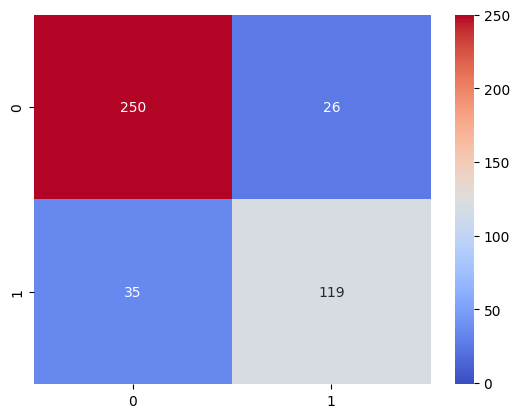

In [12]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True, vmin=-1, fmt="d", cmap="coolwarm");

Guardado de modelo con pickle

In [13]:
pickle.dump(scaler, open("../models/modelos_probados/08_scaler.pkl", "wb"))
model.save("../models/modelos_probados/08_model_sequencial.keras")
